In [255]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [256]:
# loading data 

df=pd.read_csv("titanic-passengers.csv",sep=";")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


# data preprocessing

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [258]:
df["Age"].isnull().sum()


177

In [259]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Age"].isnull().sum()

0

In [260]:

df=df.drop(["PassengerId","Name", "Cabin","Ticket"],axis =1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,2,male,28.000000,0,0,13.0000,S
1,No,3,male,25.000000,0,0,7.6500,S
2,No,3,male,20.000000,0,0,7.8542,S
3,No,3,female,29.000000,0,4,21.0750,S
4,No,1,male,31.000000,1,0,52.0000,S
...,...,...,...,...,...,...,...,...
886,Yes,2,female,14.000000,1,0,30.0708,C
887,No,3,male,22.000000,0,0,7.2292,C
888,No,3,female,30.000000,0,0,8.6625,S
889,No,3,male,29.699118,0,0,7.8958,S


# data preparation


In [261]:
df["Survived"]=df["Survived"].map({'No': 0,'Yes':1})
df["Sex"]=df["Sex"].map({'male': 0,'female':1})
df["Embarked"]=df["Embarked"].map({'S': 0,'C':1})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,0,28.000000,0,0,13.0000,0.0
1,0,3,0,25.000000,0,0,7.6500,0.0
2,0,3,0,20.000000,0,0,7.8542,0.0
3,0,3,1,29.000000,0,4,21.0750,0.0
4,0,1,0,31.000000,1,0,52.0000,0.0
...,...,...,...,...,...,...,...,...
886,1,2,1,14.000000,1,0,30.0708,1.0
887,0,3,0,22.000000,0,0,7.2292,1.0
888,0,3,1,30.000000,0,0,8.6625,0.0
889,0,3,0,29.699118,0,0,7.8958,0.0


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  812 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [263]:
df["Embarked"].fillna(df["Embarked"].mean(),inplace=True)
df["Embarked"].isnull().sum()

0

# logic regression

In [264]:
X = df.drop(["Survived"], axis=1)
X_=X.to_numpy()
X_
y=df['Survived']
y_=y.to_numpy()
y_
X_train, X_test, Y_train, Y_test = train_test_split(X_,y_, train_size = 0.7, random_state = 42)
loreg=LogisticRegression()
loreg.fit(X_train,Y_train)
Y_predicted=loreg.predict(X_test)
print("Accuracy {:.2f}".format(loreg.score(X_test,Y_test)))


Accuracy 0.80


C:\ProgramData\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



# obtained result : 

Accuracy 0.80

# ploting sigmoid 

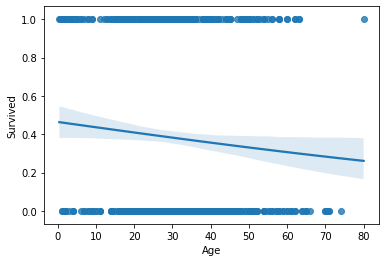

In [265]:

sns.regplot(x="Age", y='Survived', data=df, logistic=True)


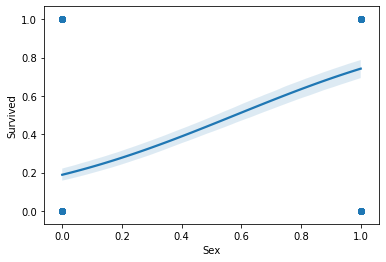

In [266]:
sns.regplot(x="Sex", y='Survived', data=df, logistic=True)


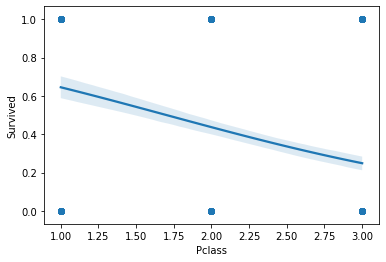

In [267]:
sns.regplot(x="Pclass", y='Survived', data=df, logistic=True)


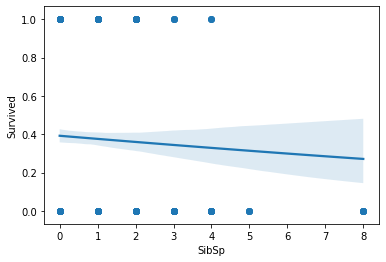

In [268]:

sns.regplot(x="SibSp", y='Survived', data=df, logistic=True)

# observation 
taking the inputs one by one seems not to give a good classification of the survived and the drawn people the decision boundary isn't clear from the plot

# Confusion Matrix

In [269]:
confusion_matrix =pd.crosstab( Y_test, Y_predicted, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix 

Predicted,0,1
Actual,,
0,140,25
1,29,74


# results 
the accuracy ofthe model is 0.8
the confusion matrix gives the following values :
140 of the cases were voted not surviving and they  didn't
29 of the passengers were predicted to drawn but they survived 
25 of the passengers were predicted to survive but they drawned 
74 of the passengers were predicted to survive and effectively  they survived 
so we have 214 cases of good predictions and 54 cases of wrong predictions 

# classification report 

In [270]:
from sklearn.metrics import classification_report
classification_report(Y_test, Y_predicted)

'              precision    recall  f1-score   support\n\n           0       0.83      0.85      0.84       165\n           1       0.75      0.72      0.73       103\n\n    accuracy                           0.80       268\n   macro avg       0.79      0.78      0.79       268\nweighted avg       0.80      0.80      0.80       268\n'

## Accuracy:
probability of  Correct predictions of surving/not surving passengers  made out of all observations is 0.8

## Recall:
Out of all passengers  that survived  we get correct 0.8

## Precision:
Out of all passengers  that we predicted survived   we actually get right  0.73

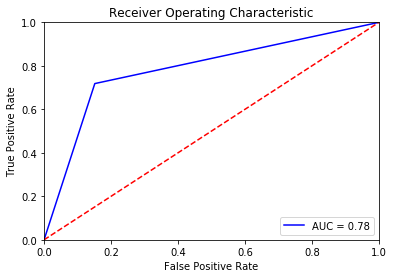

In [271]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

preds = Y_predicted
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# interpretation of the Roc/Auc curve

## ROC curves
A common way to compare models that predict probabilities for two-class problems is to use a ROC curve.

they are a  useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve.

It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

<b>Sensitivity = True Positives / (True Positives + False Negatives):</b> It describes how good the model is at predicting the positive class when the actual outcome is positive.

for our model
Sensitivity=74/(74+29)=0.71 
The true positive rate = Sensitivity = 0.71

<b>Specificity = True Negatives / (True Negatives + False Positives) : </b> It is  called the false alarm rate as it summarizes how often a positive class is predicted when the actual outcome is negative.
for our model
Specificity=140/(140+25) =0.84
False Positive Rate = 1 - Specificity =1-0.84= 0.16


<b>The area under the curve (AUC)</b>

The area under the curve (AUC) can be used as a summary of the model skill.
for our model AUC =0.78
Generally, <span>skilful models</span> are represented by curves that bow up to the top left of the plot.
<b>so we can deduce that our model is a skilful one.</b>

<span>A model with no skill </span> at each threshold is represented by a diagonal line from the bottom left of the plot to the top right and has an AUC of 0.5.

## in conclusion 
our The true positive rate = Sensitivity = 0.71
False Positive Rate = 1 - Specificity =1-0.84= 0.16
for our model AUC =0.78 and curves  bow up to the top left of the plot
so our model is a skilful one
